### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó exponenciális y-ok generálása

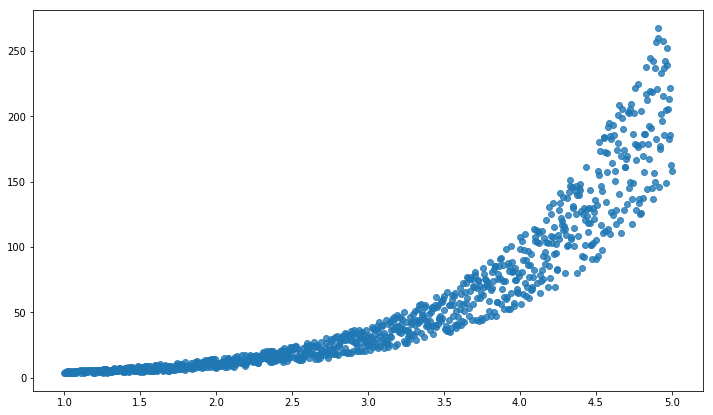

In [2]:
X = np.linspace(start=1, stop=5, num=1000)
y = []
for i in range(1000):
    rnd = np.random.randint(0, 2)
    rand = 1 + np.random.random()
    if(rnd == 0):
        y.append(np.exp(X[i])*rand)
    else:
        y.append(np.exp(X[i])*rand)
        
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből exp(X)-ek készítése - exp_X

LinregressResult(slope=1.4883473891307697, intercept=0.3958781716583175, rvalue=0.9666897386851323, pvalue=0.0, stderr=0.012474090095014514)

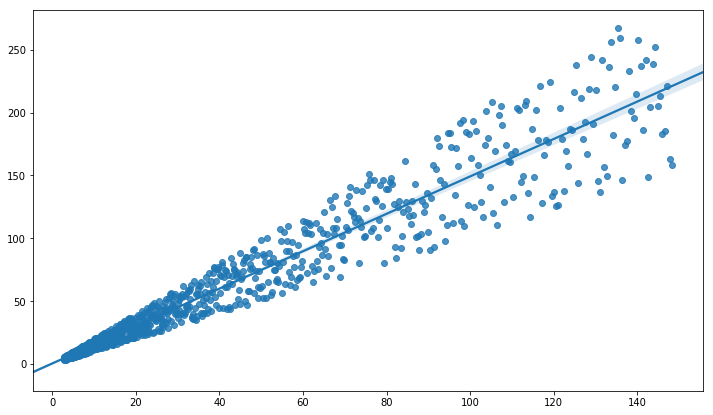

In [9]:
exp_X = np.exp(X)

plt.figure(figsize=(12, 7))
sns.regplot(x=exp_X, y=y)

egyenes = stats.linregress(np.exp(X), y)
b0 = egyenes.intercept
b1 = egyenes.slope
egyenes

### exp(X), y-hoz tartozó egyenes ábrázolása

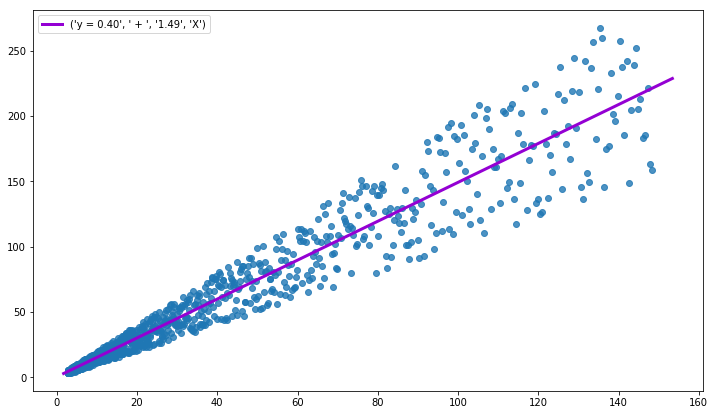

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(exp_X, y, alpha=0.8)

vonal_x = np.linspace(np.min(exp_X)-1, np.max(exp_X)+5, 2)
vonal_y = (b0 + b1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3, label=('y = {0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
plt.legend()
plt.show()

### Exponenciális görbe ábrázolása Y = B0 + B1*e^X
X lineáris, y exponenciális --> b0+b1*e^X --> e^X miatt lesz y lineárisból exponenciális

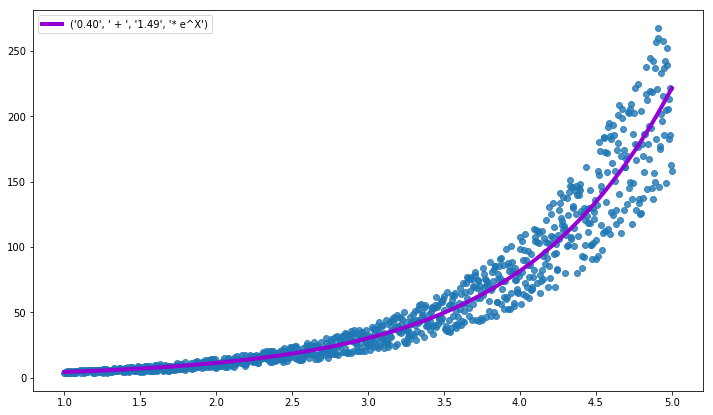

In [12]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

plt.plot(X, b0 + b1*np.exp(X), c='darkviolet', linewidth=4, label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), '* e^X'))
plt.legend()

### Prediction

In [14]:
def exp_predict(x):
    return b0 + b1*np.exp(x)

exp_predict(4.5)

134.37264051983166

### R^2

In [15]:
from sklearn.metrics import r2_score

yexp_predicted = list(map(exp_predict, X))
print('R^2: ', r2_score(y, yexp_predicted)) #(tényleges, predicted)

R^2:  0.9344890508791299


###   
###   
### Másik módszer - scipy curve_fit

In [16]:
from scipy.optimize import curve_fit 

def exp(x, a, b): 
    return a*np.exp(b*x) 
  
param, param_cov = curve_fit(exp, X, y)

print('B0: ', param[0])
print('B1: ', param[1])

B0:  1.6082688570851411
B1:  0.9835638023768783


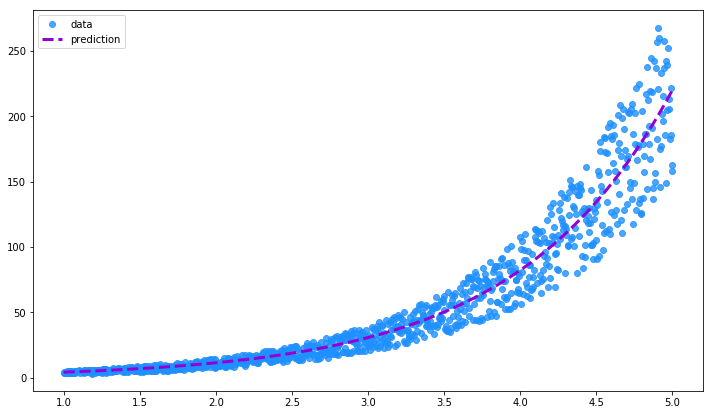

In [17]:
ans = (param[0]*(np.exp(param[1]*X)))

plt.figure(figsize=(12, 7))
plt.plot(X, y, 'o', color ='dodgerblue', label ="data", alpha=0.8)
plt.plot(X, ans, '--', color ='darkviolet',linewidth=3, label ="prediction")

plt.legend()
plt.show()